<div class="alert alert-block alert-info"><font size="6"><b>Sprint 13 Task 2 (S13_T02)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Create a simple relational database using MySQL(https://www.mysql.com/) and connect it to Python.</SPAN>

We star by importing the required library in order to connect to the database "s13_t01_erd" that we designed in previous task:

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
password = '#########'

In [3]:
connect = mysql.connector.connect(
    host = '127.0.0.1', # localhost
    user = "root",
    passwd = password,
    database = "s13_t01_erd"
    )

print(connect)

Now we made the connection.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Show that you can load some simple queries to a Pandas Dataframe.</SPAN>

The MySQLCursor of mysql-connector-python (and similar libraries) is used to execute statements to communicate with the MySQL database.

Using the methods of it you can execute SQL statements, fetch data from the result sets, call procedures.

You can create Cursor object using the cursor() method of the Connection object/class.



In [4]:
cursor = connect.cursor(buffered = True) # Creating a cursor object using the cursor() method
cursor.execute("SHOW DATABASES") # This method accepts a MySQL query as a parameter and executes the given query.

for dbs in cursor:
    print(dbs)

('information_schema',)
('mysql',)
('performance_schema',)
('s13_t01_erd',)
('sys',)


Let's see the tables from our database:

In [5]:
cursor.execute("SHOW TABLES")

for tables in cursor:
    print(tables)

('customer',)
('customer_has_store',)
('product',)
('product_family',)
('store',)
('store_has_product',)
('transaction',)
('worker',)


Now let's see the columns we have in customer table:

In [6]:
cursor.execute("SHOW COLUMNS FROM customer")

customer_columns = []
for column in cursor:
    customer_columns.append(column[0])
    print(column)

('customer_id', b'int', 'NO', 'PRI', None, 'auto_increment')
('customer_name', b'varchar(20)', 'NO', '', None, '')
('customer_mail', b'varchar(20)', 'YES', '', None, '')
('customer_phone', b'varchar(12)', 'YES', '', None, '')
('customer_birth', b'date', 'NO', '', None, '')


DataBase is empty, let's add some data:

In [18]:
cursor.execute("""
INSERT INTO customer (customer_name, customer_mail, customer_phone, customer_birth) VALUES
('Alberto', 'alberto@mail.com', '123-456-789', '2000-12-03'),
('Ines', 'Ines@mail.com', '123-456-789', '2000-12-03'),
('Jose', 'Jose@mail.com', '123-456-789', '2000-12-03'),
('Manolo', 'Manolo@mail.com', '123-456-789', '2000-12-03'),
('Xavi', 'Xavi@mail.com', '123-456-789', '2000-12-03'),
('Richard', 'Richard@mail.com', '123-456-789', '2000-12-03'),
('Clara', 'Clara@mail.com', '123-456-789', '2000-12-03'),
('Clotilde', 'Clotilde@mail.com', '123-456-789', '2000-12-03');
""")

Let's see the data we have just loaded:

In [7]:
cursor.execute("SELECT * FROM customer")
customer = cursor.fetchall()

for row in customer:
    print(row)

(1, 'Alberto', 'alberto@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(2, 'Ines', 'Ines@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(3, 'Jose', 'Jose@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(4, 'Manolo', 'Manolo@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(5, 'Xavi', 'Xavi@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(6, 'Richard', 'Richard@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(7, 'Clara', 'Clara@mail.com', '123-456-789', datetime.date(2000, 12, 3))
(8, 'Clotilde', 'Clotilde@mail.com', '123-456-789', datetime.date(2000, 12, 3))


Finally, let's present the data in a more familiar way:

In [8]:
customer_df = pd.DataFrame(customer, columns = customer_columns)
customer_df

,customer_id,customer_name,customer_mail,customer_phone,customer_birth
0,1,Alberto,alberto@mail.com,123-456-789,2000-12-03
1,2,Ines,Ines@mail.com,123-456-789,2000-12-03
2,3,Jose,Jose@mail.com,123-456-789,2000-12-03
3,4,Manolo,Manolo@mail.com,123-456-789,2000-12-03
4,5,Xavi,Xavi@mail.com,123-456-789,2000-12-03
5,6,Richard,Richard@mail.com,123-456-789,2000-12-03
6,7,Clara,Clara@mail.com,123-456-789,2000-12-03
7,8,Clotilde,Clotilde@mail.com,123-456-789,2000-12-03


Ahh, it soothes me!! 😎

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Generate a graph summarizing the data.</SPAN>

Let's do some graphs for the **products** table:

In [9]:
cursor.execute("SHOW COLUMNS FROM product")

product_columns = []
for column in cursor:
    product_columns.append(column[0])
    print(column)

('product_id', b'int', 'NO', 'PRI', None, '')
('product_name', b'varchar(20)', 'NO', '', None, '')
('product_stock', b'int', 'NO', '', None, '')
('product_cost', b'decimal(5,2)', 'NO', '', None, '')
('fproduct_id', b'int', 'NO', 'MUL', None, '')


In [10]:
cursor.execute("SELECT * FROM product")
product = cursor.fetchall()

for row in product:
    print(row)

(1, 'Xiomi Redmi 10', 1, Decimal('179.99'), 1)
(2, 'Redmi 10C', 0, Decimal('159.99'), 1)
(3, 'Poco F4', 1, Decimal('599.90'), 1)
(4, 'Honor X8', 3, Decimal('249.00'), 1)
(5, 'Xiomi Redmi 11', 8, Decimal('189.99'), 1)
(6, 'Alcatel 5033D', 2, Decimal('51.00'), 1)
(7, 'Samsung M32', 2, Decimal('219.99'), 1)
(8, 'Alcatel 1SE', 12, Decimal('99.00'), 1)
(9, 'ZTE Blade A31', 10, Decimal('84.23'), 1)
(10, 'Amazfit GTR 2', 35, Decimal('82.31'), 2)
(11, 'Samsung Watch', 2, Decimal('177.32'), 2)
(12, 'Fitbit 3', 20, Decimal('33.20'), 2)
(13, 'Apple Watch', 4, Decimal('589.90'), 2)
(14, 'Epson EcoTank', 13, Decimal('87.90'), 3)
(15, 'HP Laser Jet', 8, Decimal('189.00'), 3)
(16, 'HP DeskJet', 10, Decimal('77.05'), 3)


In [11]:
product_df = pd.DataFrame(product, columns = product_columns)
product_df

,product_id,product_name,product_stock,product_cost,fproduct_id
0,1,Xiomi Redmi 10,1,179.99,1
1,2,Redmi 10C,0,159.99,1
2,3,Poco F4,1,599.90,1
3,4,Honor X8,3,249.00,1
4,5,Xiomi Redmi 11,8,189.99,1
5,6,Alcatel 5033D,2,51.00,1
6,7,Samsung M32,2,219.99,1
7,8,Alcatel 1SE,12,99.00,1
8,9,ZTE Blade A31,10,84.23,1
9,10,Amazfit GTR 2,35,82.31,2


So, this is the products database. Now let's make some graph interpretation:

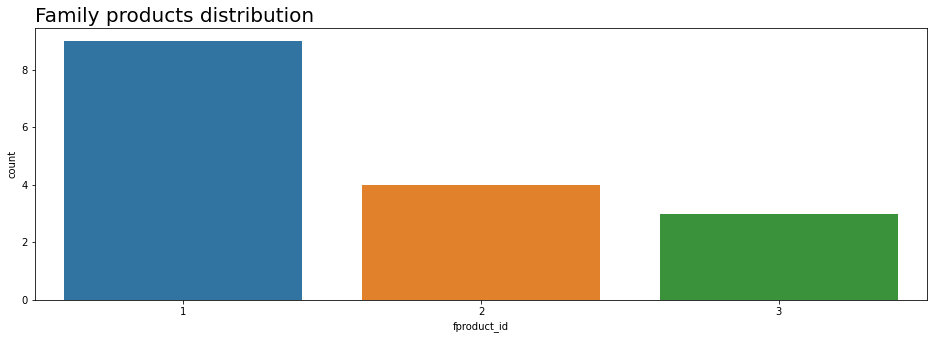

In [12]:
fig, ax = plt.subplots(figsize = (16,5))
sns.countplot(x = product_df['fproduct_id'])
plt.title('Family products distribution', loc = 'left', fontsize = 20)
plt.show()

In [13]:
cursor.execute("SELECT * FROM product_family")
product = cursor.fetchall()

for row in product:
    print(row)

(1, 'A', 'Smartphones')
(2, 'B', 'Smartwatch')
(3, 'C', 'Printers')
(4, 'D', 'Cars')
(5, 'E', 'Toys')
(6, 'F', 'Wallets')
(7, 'G', 'Notebook')
(8, 'H', 'Kindle')
(9, 'I', 'Headphones')
(10, 'J', 'Charger')
(11, 'K', 'Shaver')
(12, 'L', 'Toothbrush')
(13, 'M', 'Robot')
(14, 'N', 'Kitchen')
(15, 'O', 'TV')
(16, 'P', 'DVD')
(17, 'Q', 'Musicplayer')
(18, 'R', 'Projector')


We have more products from the Smartphone family product. Let's see about cost of inventory/stock:

In [14]:
product_df['product_stock$'] = (product_df['product_stock'] * product_df['product_cost']).astype('float64')

In [15]:
k = product_df.groupby('fproduct_id')['product_stock$'].sum()

In [16]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      16 non-null     int64  
 1   product_name    16 non-null     object 
 2   product_stock   16 non-null     int64  
 3   product_cost    16 non-null     object 
 4   fproduct_id     16 non-null     int64  
 5   product_stock$  16 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 896.0+ bytes


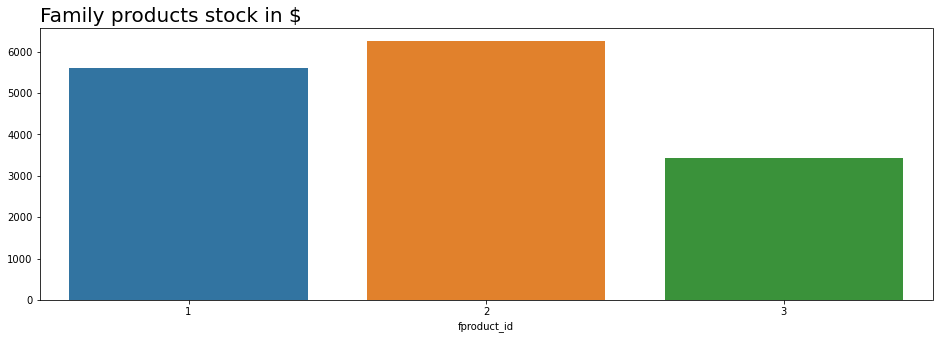

In [17]:
fig, ax = plt.subplots(figsize = (16,5))
sns.barplot(x = k.index, y = k.values)
plt.title('Family products stock in $', loc = 'left', fontsize = 20)
plt.show()

Smartwatches family products has more $ in stock.

Commit changes to database and close:

In [ ]:
connect.commit()

In [ ]:
connect.close()